In [1]:
library('EnhancedVolcano')

Loading required package: ggplot2

Loading required package: ggrepel



In [2]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [3]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [4]:
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [5]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [6]:
load(file="0710.MGUSAL.merge.seurat.Rda")

In [7]:
allPC3merge<-allPC3

In [8]:
load(file="0711-ob.integratve-7samples.Rda")

In [9]:
allPC3integrate<-ob.integrated

In [10]:
allPC3merge

An object of class Seurat 
20868 features across 14081 samples within 1 assay 
Active assay: RNA (20868 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

In [11]:
allPC3integrate

An object of class Seurat 
22868 features across 14081 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [12]:
metaallPC3merge<-allPC3merge@meta.data

In [13]:
metaallPC3integrate<-allPC3integrate@meta.data

In [14]:
colnames(metaallPC3integrate)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "percent.ig"             "integrated_snn_res.0.1"
 [7] "integrated_snn_res.0.2" "integrated_snn_res.0.3" "integrated_snn_res.0.4"
[10] "integrated_snn_res.0.5" "integrated_snn_res.0.6" "integrated_snn_res.0.7"
[13] "integrated_snn_res.0.8" "integrated_snn_res.0.9" "integrated_snn_res.1"  
[16] "seurat_clusters"

In [15]:
colnames(metaallPC3merge)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "percent.mt"     
 [5] "percent.ig"      "RNA_snn_res.0.1" "RNA_snn_res.0.2" "RNA_snn_res.0.3"
 [9] "RNA_snn_res.0.4" "RNA_snn_res.0.5" "RNA_snn_res.0.6" "RNA_snn_res.0.7"
[13] "RNA_snn_res.0.8" "RNA_snn_res.0.9" "RNA_snn_res.1"   "seurat_clusters"

In [16]:
metaallPC3merge$unilabel<-paste(metaallPC3merge$orig.ident,metaallPC3merge$percent.mt,metaallPC3merge$"nCount_RNA",metaallPC3merge$"nFeature_RNA",sep="_")

In [17]:
metaallPC3integrate$unilabel<-paste(metaallPC3integrate$orig.ident,metaallPC3integrate$percent.mt,metaallPC3integrate$"nCount_RNA",metaallPC3integrate$"nFeature_RNA",sep="_")

In [18]:
rownames(metaallPC3integrate)<-metaallPC3integrate$unilabel

In [19]:
metaallPC3integrate<-metaallPC3integrate[metaallPC3merge$unilabel,]

In [20]:
allPC3merge@meta.data$mylabel<-allPC3integrate@meta.data$seurat_clusters

In [21]:
allPC3merge@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ig,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.4,RNA_snn_res.0.5,RNA_snn_res.0.6,RNA_snn_res.0.7,RNA_snn_res.0.8,RNA_snn_res.0.9,RNA_snn_res.1,seurat_clusters,mylabel
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCTGAGATGCGAC-1_1,MGUSPC1,7931,832,1.19334481,72.03672,6,7,3,3,3,3,3,3,3,3,3,1
AAACCTGAGGGTATCG-1_1,MGUSPC1,17090,1769,0.60096154,65.82714,6,7,3,3,3,3,3,3,3,3,3,0
AAACCTGAGTCTTGCA-1_1,MGUSPC1,7026,441,0.23303633,82.74160,5,6,6,6,6,13,13,13,14,15,13,0
AAACGGGAGGTGCACA-1_1,MGUSPC1,10283,727,0.01785236,77.72025,5,6,6,6,6,7,7,8,9,8,7,0
AAACGGGGTAAGGATT-1_1,MGUSPC1,9876,616,0.99713693,81.25185,5,6,6,6,6,13,13,13,14,15,13,0
AAACGGGGTGCAGTAG-1_1,MGUSPC1,16171,1394,1.07445696,75.76374,6,7,3,3,3,3,3,3,3,3,3,3
AAACGGGTCCAGATCA-1_1,MGUSPC1,1736,185,1.05849582,82.11699,5,6,6,6,6,13,13,13,14,15,13,2
AAACGGGTCTAACGGT-1_1,MGUSPC1,17402,1676,0.62338211,70.29954,6,7,3,3,3,3,3,3,3,3,3,0
AAAGATGCATGAGCGA-1_1,MGUSPC1,4096,429,0.11394713,77.05105,5,6,6,6,6,13,13,13,14,15,13,3


In [22]:
options(repr.plot.height=8,repr.plot.width=8)

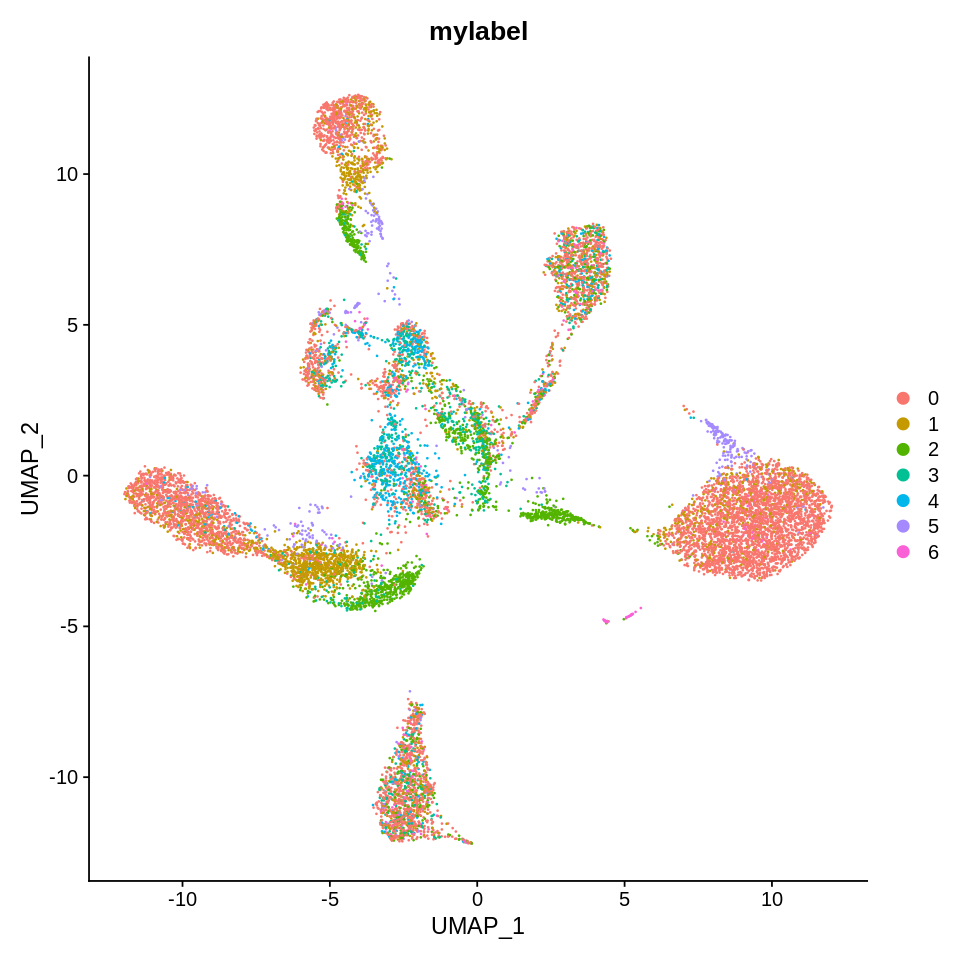

In [23]:
DimPlot(allPC3merge, reduction = "umap",group.by="mylabel",label=F)

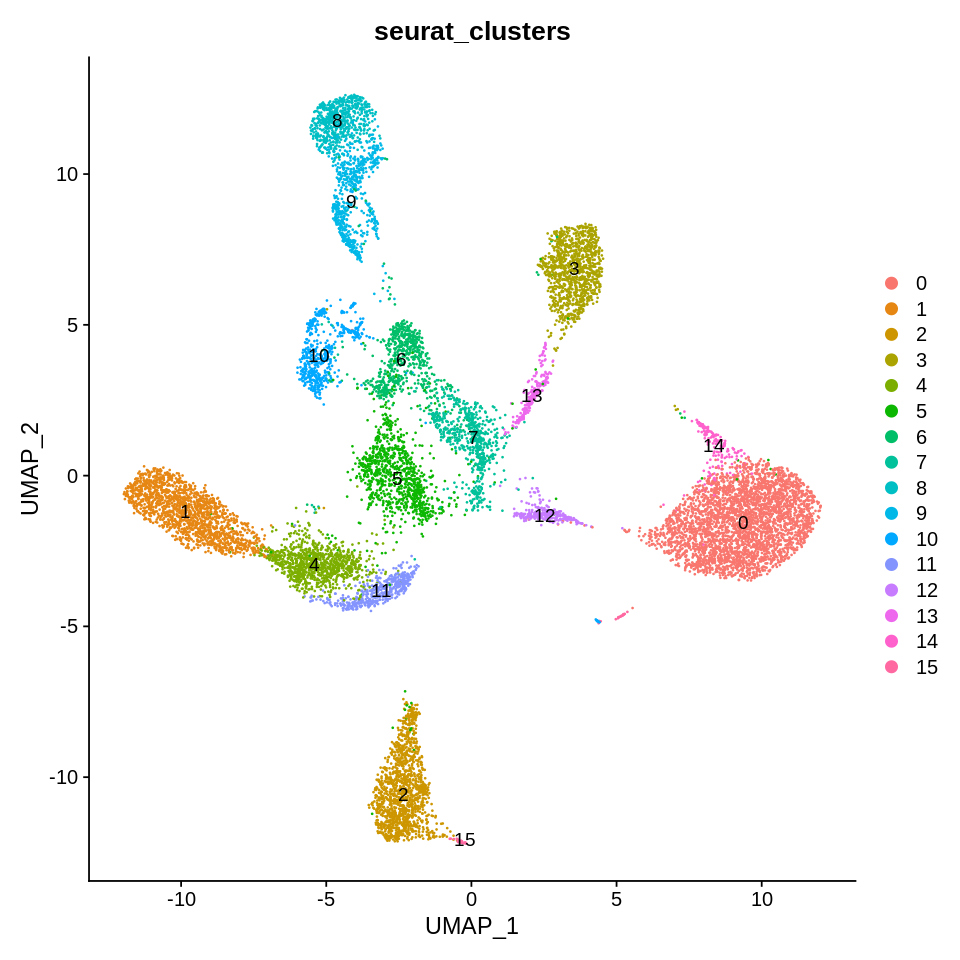

In [24]:
DimPlot(allPC3merge, reduction = "umap",group.by="seurat_clusters",label=T)

In [25]:
allPC3merge@meta.data$orig.ident<-gsub('1','',allPC3merge@meta.data$orig.ident)

In [26]:
allPC3merge@meta.data$orig.ident<-gsub('2','',allPC3merge@meta.data$orig.ident)

In [27]:
allPC3merge@meta.data$orig.ident<-gsub('3','hi',allPC3merge@meta.data$orig.ident)

In [28]:
allPC3merge@meta.data$orig.ident<-gsub('public','normal',allPC3merge@meta.data$orig.ident)

In [29]:
table(allPC3merge@meta.data$orig.ident)


  MGUSPC normalPC    pALPC  pALPChi 
    3339     1071     5481     4190 

In [30]:
table<-allPC3merge@meta.data

In [31]:
table$labelre<-paste(table$orig.ident,table$'seurat_clusters',sep=".")

In [32]:
table2<-table[which(table$labelre%in%c(paste('normalPC',0:15,sep="."),paste('MGUSPC',c(0:4,8,9,11:15),sep="."),paste('pALPC',c(0:4,8,9,11:15),sep="."),paste('pALPChi',c(0:4,8,9,11:15),sep="."))),]

In [33]:
allPC3mergeban<-subset(allPC3merge, cells=rownames(table2))

In [34]:
allPC3mergeban

An object of class Seurat 
20868 features across 12227 samples within 1 assay 
Active assay: RNA (20868 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

In [35]:
allPC3merge0<-subset(allPC3mergeban,mylabel=='0')

In [36]:
allPC3merge1<-subset(allPC3mergeban,mylabel=='1')

In [37]:
allPC3merge2<-subset(allPC3mergeban,mylabel=='2')

In [38]:
allPC3merge3<-subset(allPC3mergeban,mylabel=='3')

In [39]:
allPC3merge4<-subset(allPC3mergeban,mylabel=='4')

In [40]:
allPC3merge5<-subset(allPC3mergeban,mylabel=='5')

In [41]:
allPC3merge6<-subset(allPC3mergeban,mylabel=='6')

In [42]:
Idents(object = allPC3merge0) <- "orig.ident"

In [43]:
Idents(object = allPC3merge1) <- "orig.ident"

In [44]:
Idents(object = allPC3merge2) <- "orig.ident"

In [45]:
Idents(object = allPC3merge3) <- "orig.ident"

In [46]:
Idents(object = allPC3merge4) <- "orig.ident"

In [47]:
Idents(object = allPC3merge5) <- "orig.ident"

In [48]:
Idents(object = allPC3merge6) <- "orig.ident"

In [49]:
##Cluster0

In [50]:
merge.markers1A <- FindMarkers(allPC3merge0,ident.1='pALPC',ident.2='pALPChi')

In [51]:
merge.markers1A<-merge.markers1A[-grep('IG',rownames(merge.markers1A)),]

In [52]:
options(repr.plot.height=8,repr.plot.width=7)

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


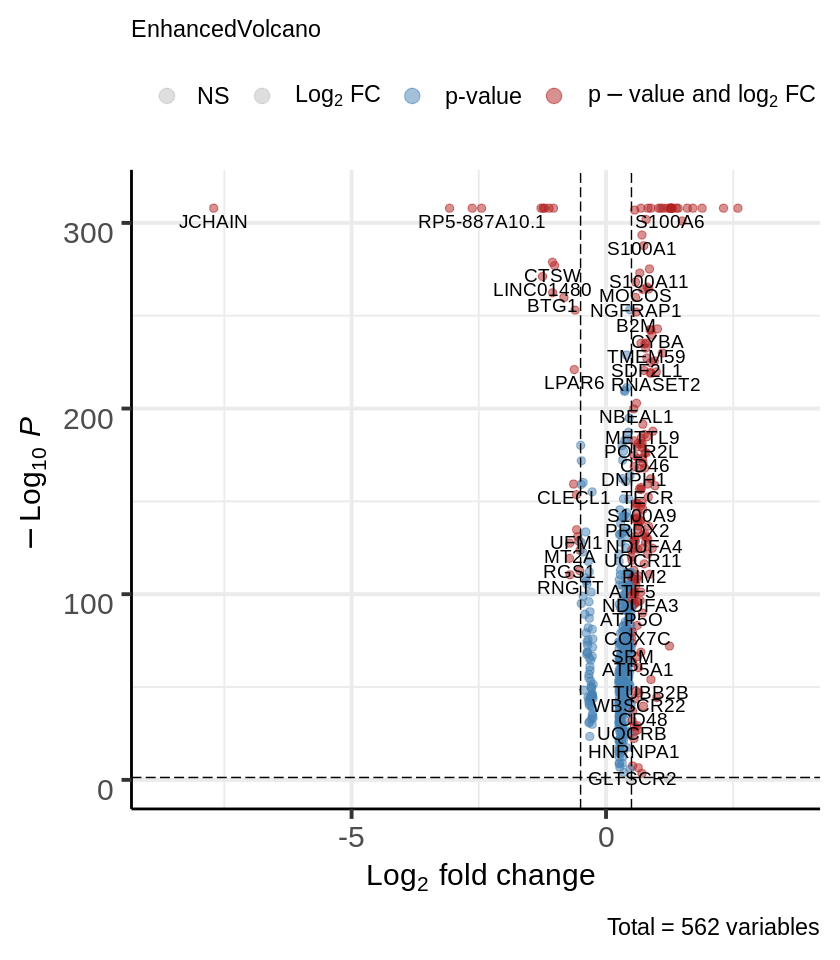

In [53]:
EnhancedVolcano(merge.markers1A,
                lab = rownames(merge.markers1A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.5,
                  pointSize = 2,
                      labSize = 4,
               col=c('grey','grey','steelblue','firebrick'))

In [54]:
ggsave("fig.4.1.pdf",height=8,width=7)
dev.off()

null device 
          1

In [55]:
write.csv(merge.markers1A,file='0914.cluster0.ALAL.csv')

In [56]:
merge.markers2A <- FindMarkers(allPC3merge0,ident.1='pALPC',ident.2='normalPC')

In [57]:
merge.markers2A<-merge.markers2A[-grep('IG',rownames(merge.markers2A)),]

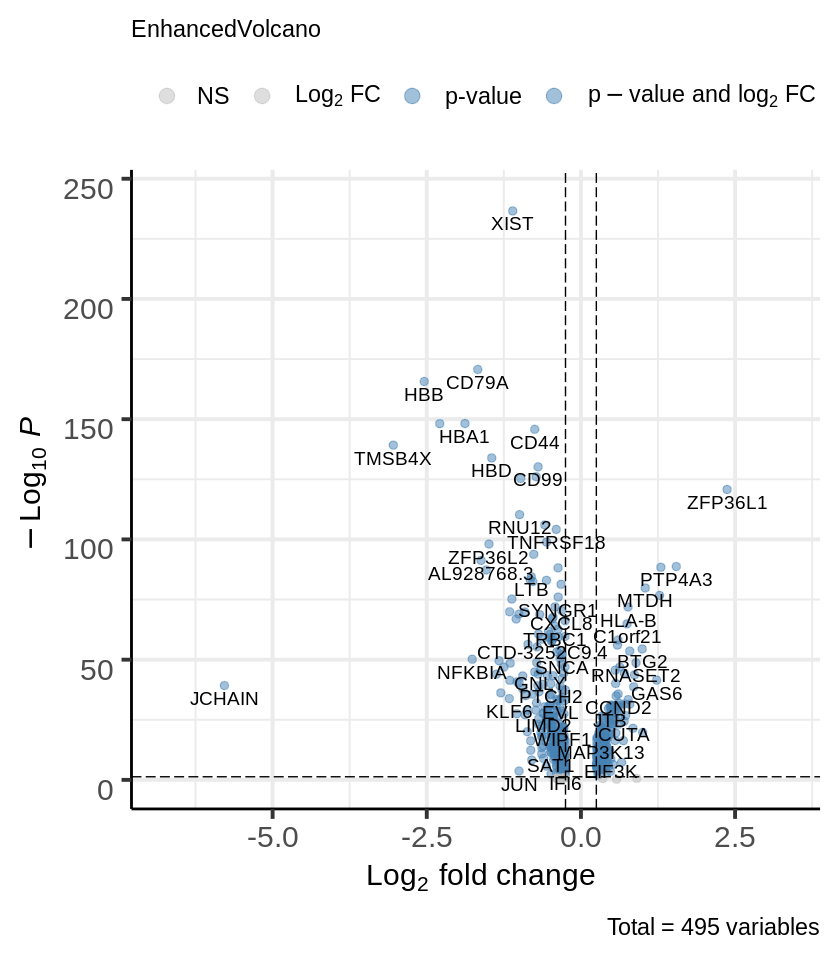

In [58]:
EnhancedVolcano(merge.markers2A,
                lab = rownames(merge.markers2A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
                               col=c('grey','grey','steelblue','steelblue'))

In [59]:
ggsave("fig.s4.1.pdf",height=8,width=7)
dev.off()

null device 
          1

In [60]:
write.csv(merge.markers2A,file='0914.cluster0.ALnor.csv')

In [61]:
merge.markers3A <- FindMarkers(allPC3merge0,ident.1='pALPChi',ident.2='normalPC')

In [62]:
merge.markers3A<-merge.markers3A[-grep('IG',rownames(merge.markers3A)),]

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


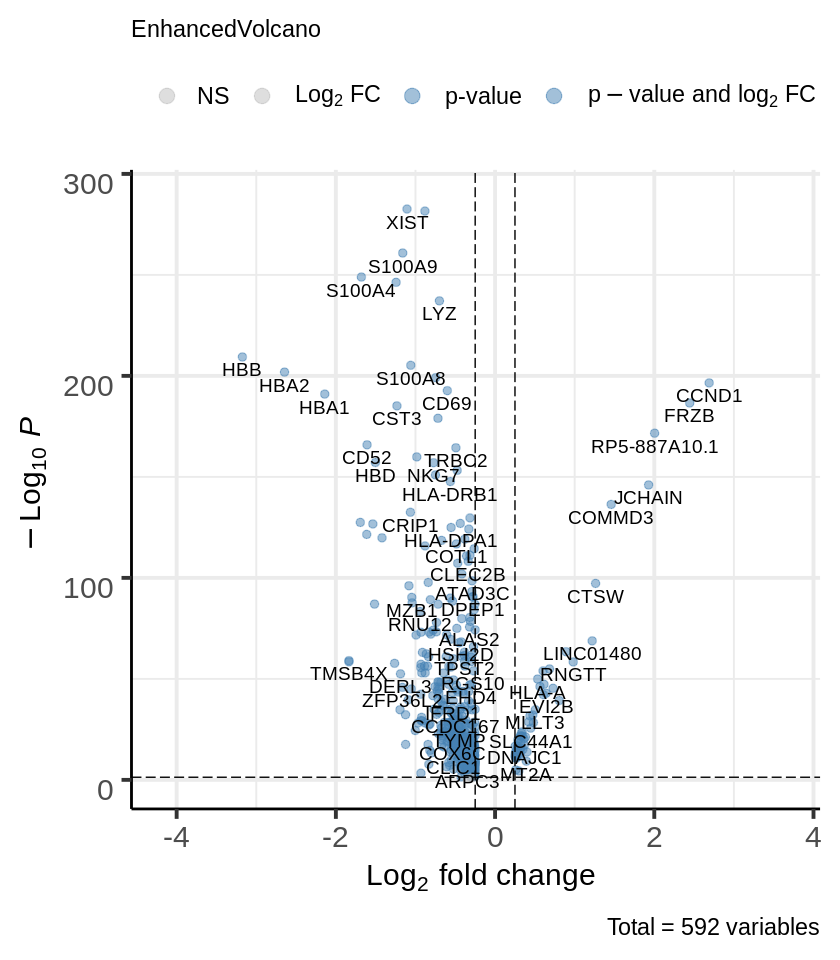

In [63]:
EnhancedVolcano(merge.markers3A,
                lab = rownames(merge.markers3A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
                               col=c('grey','grey','steelblue','steelblue'))

In [64]:
ggsave("fig.s4.2.pdf",height=8,width=7)
dev.off()

null device 
          1

In [65]:
write.csv(merge.markers3A,file='0914.cluster0.ALhinor.csv')

In [66]:
merge.markers4A <- FindMarkers(allPC3merge0,ident.1='pALPC',ident.2='MGUSPC')

In [67]:
merge.markers4A<-merge.markers4A[-grep('IG',rownames(merge.markers4A)),]

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


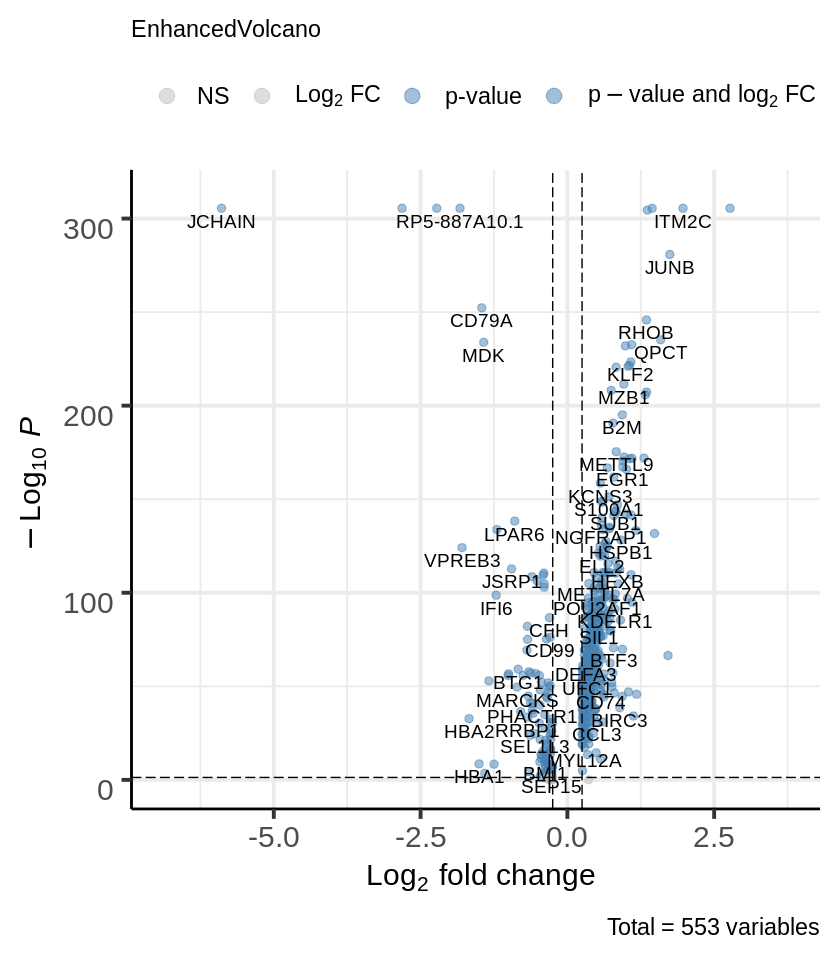

In [68]:
EnhancedVolcano(merge.markers4A,
                lab = rownames(merge.markers4A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
                               col=c('grey','grey','steelblue','steelblue'))

In [69]:
ggsave("fig.s4.3.pdf",height=8,width=7)
dev.off()

null device 
          1

In [70]:
write.csv(merge.markers3A,file='0914.cluster0.ALMGUS.csv')

In [71]:
merge.markers5A <- FindMarkers(allPC3merge0,ident.1='pALPChi',ident.2='MGUSPC')

In [72]:
merge.markers5A<-merge.markers5A[-grep('IG',rownames(merge.markers5A)),]

In [73]:
summary(merge.markers5A)

     p_val           avg_log2FC           pct.1            pct.2       
 Min.   :0.00000   Min.   :-2.04126   Min.   :0.0000   Min.   :0.0010  
 1st Qu.:0.00000   1st Qu.:-0.40851   1st Qu.:0.2680   1st Qu.:0.2650  
 Median :0.00000   Median :-0.25602   Median :0.5550   Median :0.4050  
 Mean   :0.01549   Mean   :-0.05176   Mean   :0.5478   Mean   :0.4479  
 3rd Qu.:0.00000   3rd Qu.: 0.34873   3rd Qu.:0.8640   3rd Qu.:0.6160  
 Max.   :0.83405   Max.   : 1.81909   Max.   :1.0000   Max.   :1.0000  
   p_val_adj     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.1194  
 3rd Qu.:0.0000  
 Max.   :1.0000  

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


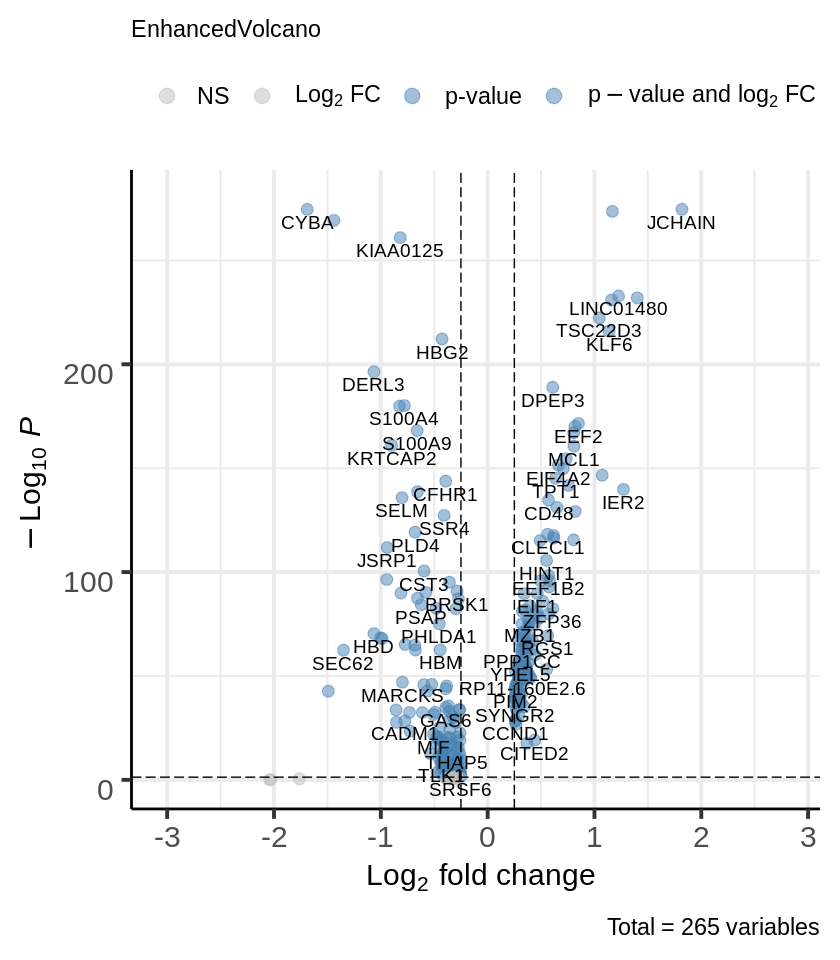

In [74]:
EnhancedVolcano(merge.markers5A,
                lab = rownames(merge.markers5A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 3,
                      labSize = 4,
                               col=c('grey','grey','steelblue','steelblue'))

In [75]:
ggsave("fig.s4.4.pdf",height=8,width=7)
dev.off()

null device 
          1

In [76]:
write.csv(merge.markers3A,file='0914.cluster0.ALhiMGUS.csv')

In [77]:
###Cluster2

In [78]:
merge.markers1A <- FindMarkers(allPC3merge2,ident.1='pALPC',ident.2='pALPChi')

In [79]:
merge.markers1A<-merge.markers1A[-grep('IG',rownames(merge.markers1A)),]

In [80]:
options(repr.plot.height=8,repr.plot.width=7)

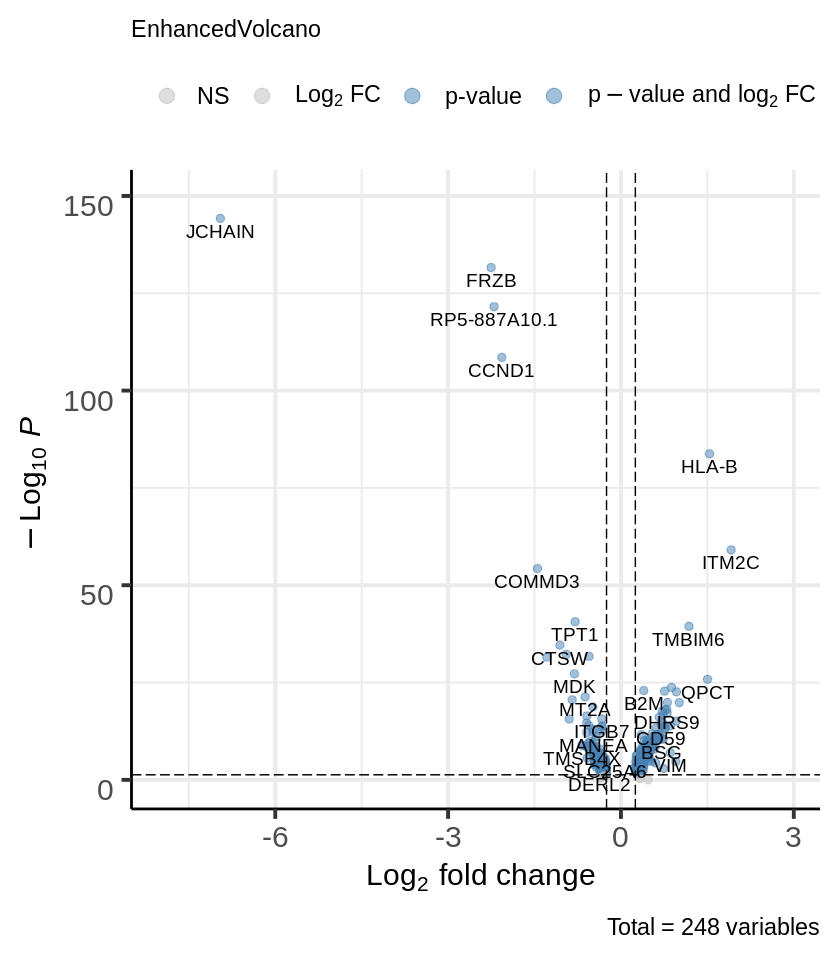

In [81]:
EnhancedVolcano(merge.markers1A,
                lab = rownames(merge.markers1A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
                               col=c('grey','grey','steelblue','steelblue'))

In [82]:
ggsave("fig.s4.5.pdf",height=8,width=7)
dev.off()

null device 
          1

In [83]:
merge.markers2A <- FindMarkers(allPC3merge2,ident.1='pALPC',ident.2='normalPC')

In [84]:
merge.markers2A<-merge.markers2A[-grep('IG',rownames(merge.markers2A)),]

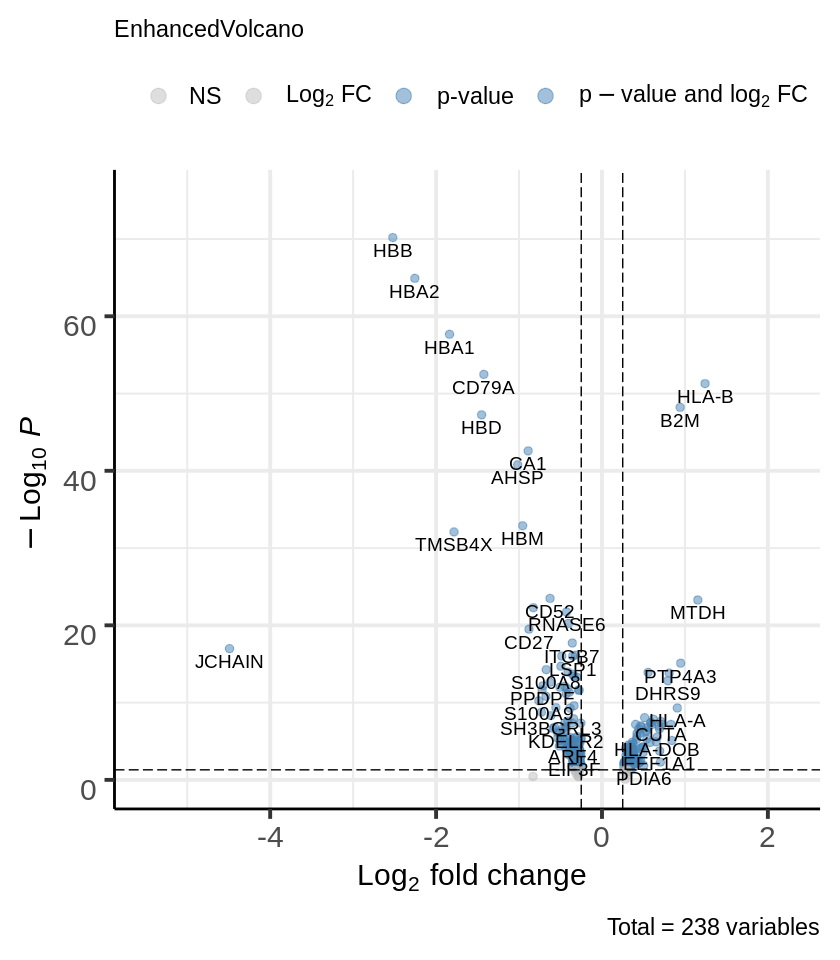

In [85]:
EnhancedVolcano(merge.markers2A,
                lab = rownames(merge.markers2A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
                 col=c('grey','grey','steelblue','steelblue'))

In [86]:
ggsave("fig.s4.6.pdf",height=8,width=7)
dev.off()

null device 
          1

In [87]:
write.csv(merge.markers2A,file='0914.cluster2.ALnor.csv')

In [88]:
merge.markers3A <- FindMarkers(allPC3merge2,ident.1='pALPChi',ident.2='normalPC')

In [89]:
merge.markers3A<-merge.markers3A[-grep('IG',rownames(merge.markers3A)),]

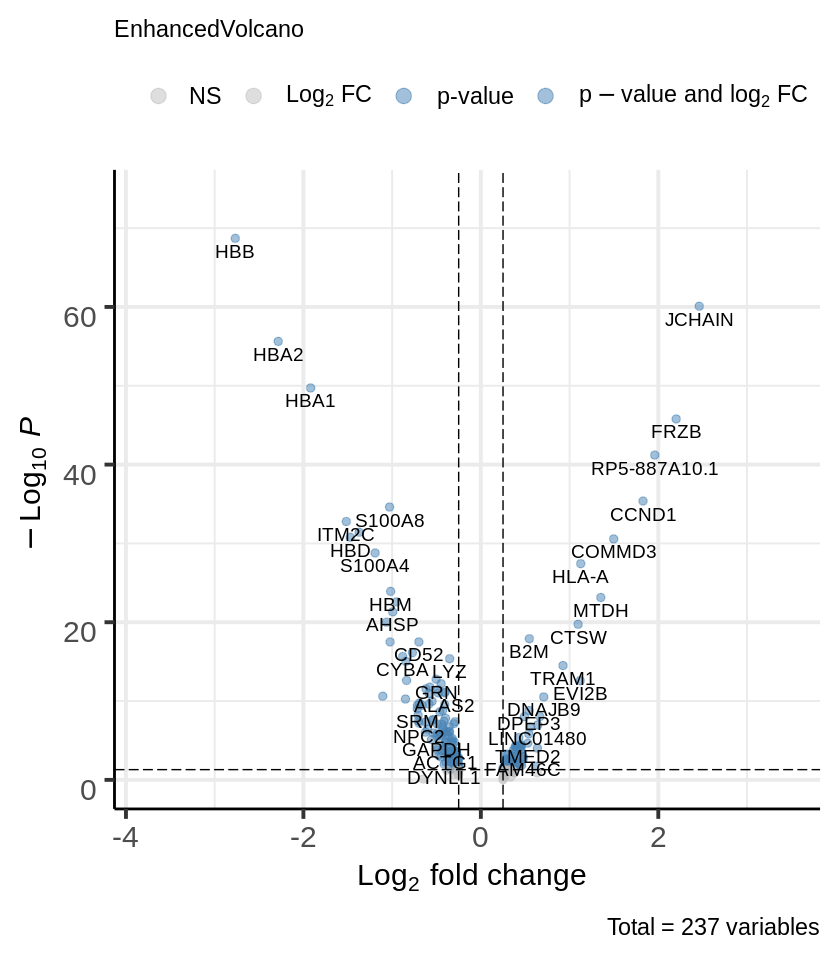

In [90]:
EnhancedVolcano(merge.markers3A,
                lab = rownames(merge.markers3A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
               col=c('grey','grey','steelblue','steelblue'))

In [91]:
ggsave("fig.s4.7.pdf",height=8,width=7)
dev.off()

null device 
          1

In [92]:
write.csv(merge.markers3A,file='0914.cluster2.ALhinor.csv')

In [93]:
merge.markers4A <- FindMarkers(allPC3merge2,ident.1='pALPC',ident.2='MGUSPC')

In [94]:
merge.markers4A<-merge.markers4A[-grep('IG',rownames(merge.markers4A)),]

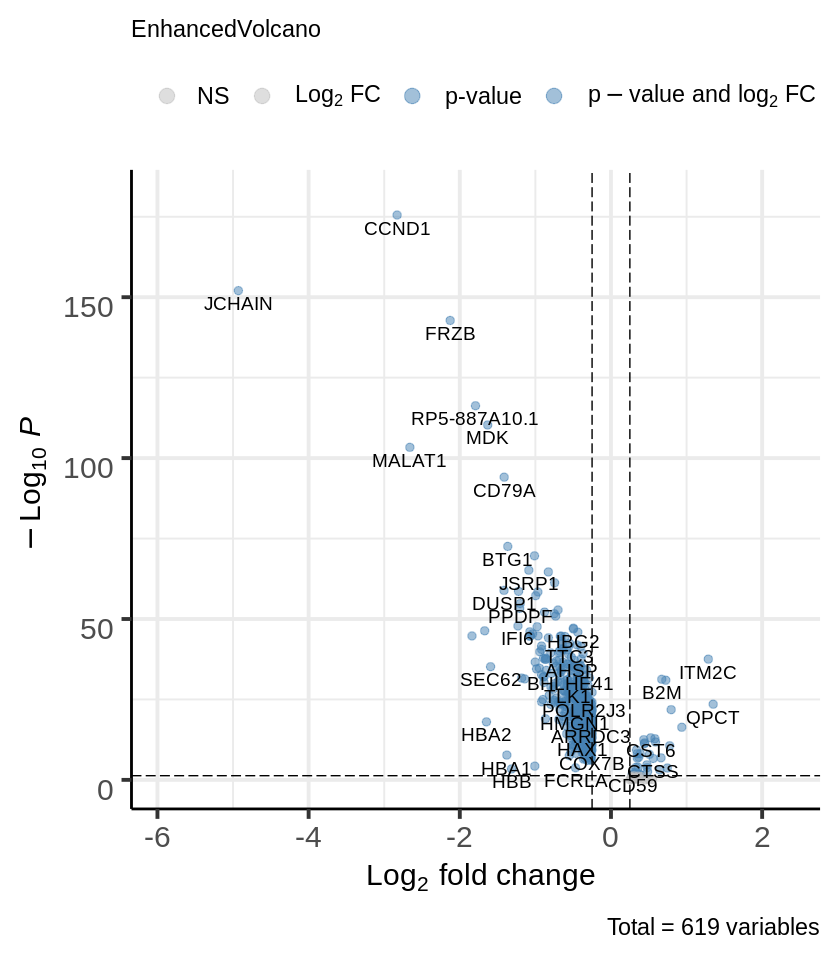

In [95]:
EnhancedVolcano(merge.markers4A,
                lab = rownames(merge.markers4A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
                              col=c('grey','grey','steelblue','steelblue'))

In [96]:
ggsave("fig.s4.8.pdf",height=8,width=7)
dev.off()

null device 
          1

In [97]:
write.csv(merge.markers4A,file='0914.cluster2.ALMGUS.csv')

In [98]:
merge.markers5A <- FindMarkers(allPC3merge2,ident.1='pALPChi',ident.2='MGUSPC')

In [99]:
merge.markers5A<-merge.markers5A[-grep('IG',rownames(merge.markers5A)),]

In [100]:
summary(merge.markers5A)

     p_val          avg_log2FC          pct.1            pct.2       
 Min.   :0.0000   Min.   :-2.5404   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:-0.4672   1st Qu.:0.0380   1st Qu.:0.2437  
 Median :0.0000   Median :-0.3408   Median :0.0870   Median :0.3485  
 Mean   :0.0109   Mean   :-0.3971   Mean   :0.1708   Mean   :0.3982  
 3rd Qu.:0.0000   3rd Qu.:-0.2835   3rd Qu.:0.2122   3rd Qu.:0.5132  
 Max.   :0.8669   Max.   : 2.0229   Max.   :1.0000   Max.   :1.0000  
   p_val_adj        
 Min.   :0.0000000  
 1st Qu.:0.0000000  
 Median :0.0000006  
 Mean   :0.0593353  
 3rd Qu.:0.0001780  
 Max.   :1.0000000  

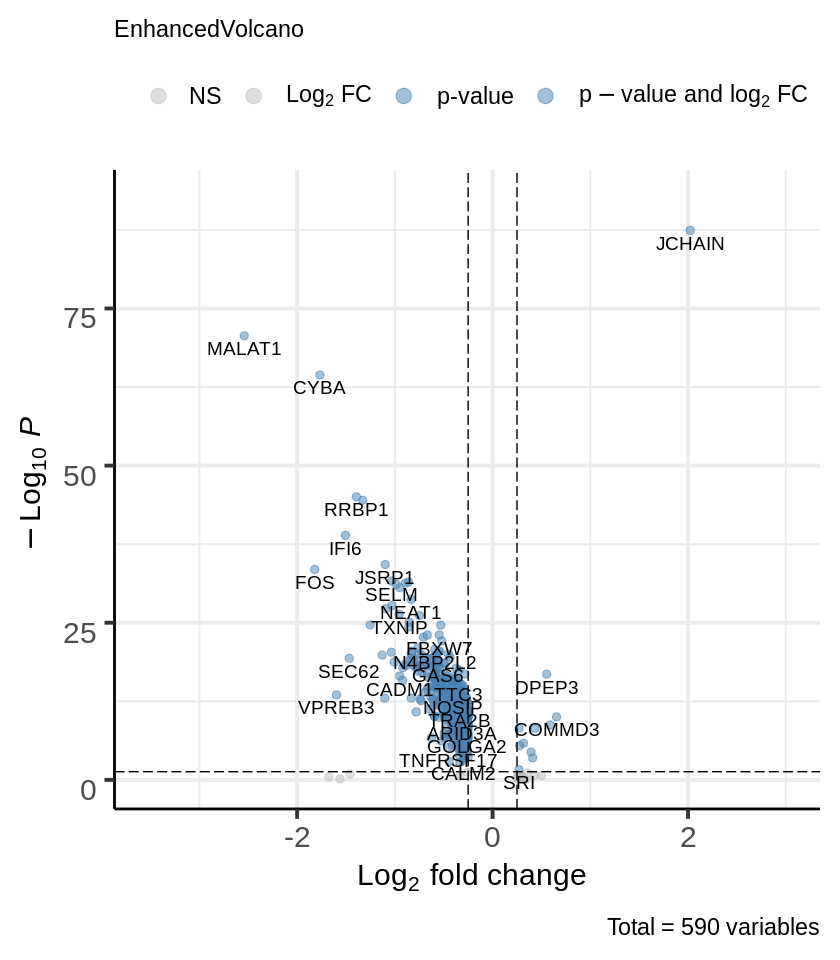

In [101]:
EnhancedVolcano(merge.markers5A,
                lab = rownames(merge.markers5A),
                x = 'avg_log2FC',
                y = 'p_val',
               title = NULL,
                  pCutoff =0.05,
                  FCcutoff =0.25,
                  pointSize = 2,
                      labSize = 4,
               col=c('grey','grey','steelblue','steelblue'))

In [102]:
ggsave("fig.s4.9.pdf",height=8,width=7)
dev.off()

null device 
          1

In [103]:
write.csv(merge.markers5A,file='0914.cluster2.ALhiMGUS.csv')